<a href="https://colab.research.google.com/github/Jegsaran/Deep-learning/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [23]:
#loading dataset
cifar = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar.load_data()

In [24]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [25]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
#Normalizing the data
x_train,x_test = x_train/255, x_test/255
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [28]:
#Since the output data should be a 1D array, lets flatten the y_train & y_test

y_train,y_test = y_train.flatten(),y_test.flatten()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [29]:
# number of classes

K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [31]:
#Model Building

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [32]:
#Model Compilation

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
r = model.fit(x_train,y_train, validation_data= (x_test,y_test),epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5723 - accuracy: 0.4269 - val_loss: 1.3045 - val_accuracy: 0.5258
Epoch 2/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2396 - accuracy: 0.5571 - val_loss: 1.1604 - val_accuracy: 0.5868
Epoch 3/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0935 - accuracy: 0.6105 - val_loss: 1.0512 - val_accuracy: 0.6269
Epoch 4/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9810 - accuracy: 0.6498 - val_loss: 0.9585 - val_accuracy: 0.6539
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9094 - accuracy: 0.6771 - val_loss: 0.9794 - val_accuracy: 0.6545
Epoch 6/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8399 - accuracy: 0.7020 - val_loss: 0.9235 - val_accuracy: 0.6782
Epoch 7/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7863 - accuracy: 0.7212 - val_loss: 0.9244 -

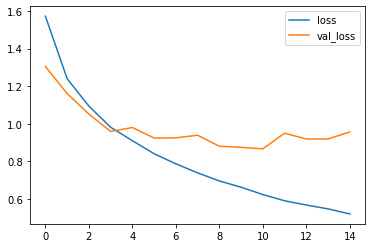

In [34]:
#plotting loss per iteration

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

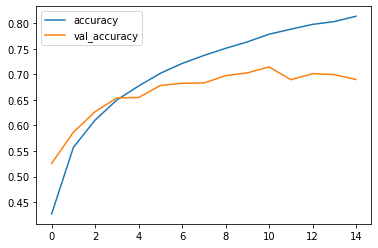

In [35]:
#plotting accuracy per iteration

plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [36]:
#Model Evaluation

print(model.evaluate(x_test,y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.9560 - accuracy: 0.6898
[0.9559835195541382, 0.6898000240325928]


**Observation:**

We got an accuracy of ~69 %. 
Its evident from the loss and accuracy curve that the model could be Overfitting.

Inorder to overcome this we can try Max_pooling & Batch_Normalization.